<h1 style="text-align: center;">Predictive Models for Technical Analysis in the Stock Market
<br>
Bullish Engulfing Pattern
</h1>

<p style="text-align: center;">
    Rubén Díaz<br>
    DataDev<br>
    This project is licensed under the MIT License.
    <br><br>
    <b>Data as of: 2025-09-01</b>
</p>

<div style="text-align: center;"> 
    <img src="https://images.pexels.com/photos/210607/pexels-photo-210607.jpeg" alt="market" width="800">
</div>



## Business Understanding

The stock market is a complex and highly volatile environment, where asset prices fluctuate in response to economic, political, and behavioral factors. In this context, traders use technical analysis tools to identify patterns that may anticipate future movements. Among these, the bullish engulfing pattern is considered a signal of a potential trend reversal, where a downward movement is expected to give way to an upward rebound. However, in practice, the mere appearance of this pattern does not always lead the market to react as expected, which limits its reliability as a decision-making tool.

The purpose of this project is not simply to detect the formation of a bullish engulfing pattern, but to predict whether such a signal will be confirmed in subsequent candlesticks. In other words, the model seeks to estimate the probability that, following the appearance of the pattern, the price will indeed begin an upward movement. In this way, the aim is to reduce the uncertainty associated with the traditional use of technical analysis, providing investors with a quantitative tool that evaluates the actual validity of the pattern in different scenarios.

This project represents a significant challenge, since predicting the outcome of a pattern must contend with the market’s high volatility and the risk of model overfitting. Furthermore, price variations triggered by news or other external events remain outside the scope of analysis, adding another layer of complexity to the modeling process. It is important to emphasize that the development of a predictive model to assess the feasibility of a bullish engulfing pattern is intended solely as a decision-support tool for investors and should under no circumstances be interpreted as a buy recommendation.

## Understanding the Data

For this project, the historical price and volume data of the analyzed assets were obtained from [Yahoo Finance](https://finance.yahoo.com/), a source widely used by the financial community due to its accessibility and reliability. In addition, the [TA-Lib](https://ta-lib.org/) library was employed, which specializes in the calculation of technical indicators and recognition of chart patterns, in order to automate the detection of relevant formations and generate an enriched dataset to serve as the foundation for predictive modeling.


In [1]:
tickersNasdaq100 = [
    "AAPL", "ABNB", "ADBE", "ADI", "ADP", "ADSK", "AEP", "AMAT", "AMD", "AMGN",
    "AMZN", "ANSS", "APP", "ARM", "ASML", "AVGO", "AXON", "AZN", "BIIB", "BKNG",
    "BKR", "CCEP", "CDNS", "CDW", "CHTR", "CMCSA", "COST", "CPRT", "CRWD",
    "CSCO", "CSGP", "CSX", "CTAS", "CTSH", "DASH", "DDOG", "DXCM", "EA", "EXC",
    "FANG", "FAST", "FTNT", "GEHC", "GFS", "GILD", "GOOG", "GOOGL", "HON", "IDXX",
    "INTC", "INTU", "ISRG", "KDP", "KHC", "KLAC", "LIN", "LRCX", "LULU", "MAR",
    "MCHP", "MDLZ", "MELI", "META", "MNST", "MRVL", "MSFT", "MSTR", "MU", "NFLX",
    "NVDA", "NXPI", "ODFL", "ON", "ORLY", "PANW", "PAYX", "PCAR", "PDD", "PEP",
    "PLTR", "PYPL", "QCOM", "REGN", "ROP", "ROST", "SBUX", "SHOP", "SNPS", "TEAM",
    "TMUS", "TSLA", "TTD", "TTWO", "TXN", "VRSK", "VRTX", "WBD", "WDAY", "XEL",
    "ZS"
]

tickersNYSE20 = [
    "JNJ", "PG", "KO", "DIS", "WMT", "VZ", "CVX", "XOM", "BA", "IBM", "MCD", "GS", 
    "JPM", "C", "CAT", "MMM", "NKE", "UNH", "GE", "T" 
]

In [2]:
# # Download data from Yahoo Finance (run once).
# # After the data file is saved, comment out this block.

# import yfinance as yf
# import os
# from datetime import datetime
# import json


# def candleType(row):  
#     if row['Open'] < row['Close']:
#         return 1
#     elif row['Open'] > row['Close']:
#         return -1
#     return 0

# def getYahooDf(tickers, period):
#     data = {}

#     for ticker in tickers:
#         t = yf.Ticker(ticker)
#         df = t.history(period=period)
#         df['Type'] = df.apply(candleType, axis=1)

#         data[ticker] = df

#     return data



# # Model data
# dfDict = getYahooDf(tickersNasdaq100, '5y')


# #Save the data in the yahoo_data folder
# # Folder to save the CSV files
# os.makedirs("yahoo_data", exist_ok=True)


# for ticker, df in dfDict.items():
#     df.to_csv(f"yahoo_data/{ticker}.csv")


# # backtester data
# dfBackTester = getYahooDf(tickersNYSE20, '4y')
# os.makedirs("yahoo_data/backTester", exist_ok=True)
# for ticker, df in dfBackTester.items():
#     df.to_csv(f"yahoo_data/backTester/{ticker}.csv")    

# metadata = {
#     "data_as_of": datetime.today().strftime("%Y-%m-%d")
# }

# with open("metadata.json", "w") as f:
#     json.dump(metadata, f)


In [3]:
# Import data from the yahoo_data folder
import pandas as pd
import os
import json

# Model training
dfDict = {}
folder = "yahoo_data"

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        ticker = filename.replace(".csv", "")
        df = pd.read_csv(os.path.join(folder, filename), index_col=0, parse_dates=True)
        dfDict[ticker] = df


## Backtester
dfBackTester = {}
folderBT = "yahoo_data/backTester"

for filename in os.listdir(folderBT):
    if filename.endswith(".csv"):
        ticker = filename.replace(".csv", "")
        df = pd.read_csv(os.path.join(folderBT, filename), index_col=0, parse_dates=True)
        dfBackTester[ticker] = df


# Load metadata: date when the data was last downloaded
with open("metadata.json", "r") as f:
    metadata = json.load(f)

print(f"Data loaded up to {metadata['data_as_of']}")


Data loaded up to 2025-09-01


In all DataFrames, the **Date** column serves as the index, and the following columns are included:  

- **Open**: opening price of the day.  
- **High**: highest price reached during the day.  
- **Low**: lowest price reached during the day.  
- **Close**: closing price of the day.  
- **Volume**: volume traded on that day.  
- **Dividends**: amount of dividend paid, if any on that day.  
- **Stock Splits**: split ratio applied; for example, a value of 2 indicates a 2-for-1 split.  
- **Type**: candlestick type, -1 for bearish, 0 for doji, and 1 for bullish.  


## Data Preparation

The objective of this analysis is to develop a predictive model for the behavior of different candlestick patterns. To achieve this, we will detect where a bullish engulfing pattern occurs and analyze the following 15 days. We consider the pattern to be fulfilled if a 5% return can be achieved in the subsequent days. Otherwise, it is considered not fulfilled.

Additionally, we will add the following indicators to the DataFrame:
- RSI
- Williams
- ADX
- MACD
- Bollinger Bands
- ATR
- Stochastic
- MFI
- CCI
- ROC
- BOP
- SMA

Next, we will populate the DataFrame with the values of each of these indicators using the *TA-Lib* library in their respective columns.


In [4]:
import talib as ta

def calculate_indicators(df, params=None):
    """
    Calcula múltiples indicadores técnicos sobre un DataFrame de velas.
    
    Args:
        df (pd.DataFrame): DataFrame con columnas 'Open', 'High', 'Low', 'Close', 'Volume'.
        params (dict): Diccionario con parámetros de indicadores (opcional).
    
    Returns:
        pd.DataFrame: DataFrame con nuevas columnas de indicadores.
    """
    # Valores por defecto si no se pasa params
    if params is None:
        params = {
            'RSI': 14,
            'WilliamsR': 14,
            'ROC': 10,
            'ADX': 14,
            'MACD': {'fastperiod': 12, 'slowperiod': 26, 'signalperiod': 9},
            'BBANDS': {'timeperiod': 40, 'nbdevup': 2.5, 'nbdevdn': 2.5},
            'ATR': 14,
            'MFI': 14,
            'CCI': 14,
            'STOCH': {'fastk_period': 14, 'slowk_period': 3, 'slowk_matype': 0,
                      'slowd_period': 3, 'slowd_matype': 0},
            'STOCHRSI': {'timeperiod': 14, 'fastk_period': 14,
                         'fastd_period': 3, 'fastd_matype': 0},
        }

    # --- RSI ---
    df['RSI'] = ta.RSI(df['Close'], timeperiod=params['RSI'])

    # --- Williams %R ---
    df['WilliamsR'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=params['WilliamsR'])

    # --- ROC ---
    df['ROC'] = ta.ROC(df['Close'], timeperiod=params['ROC'])

    # --- ADX ---
    df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=params['ADX'])

    # --- MACD ---
    macd, macdsignal, macdhist = ta.MACD(
        df['Close'],
        fastperiod=params['MACD']['fastperiod'],
        slowperiod=params['MACD']['slowperiod'],
        signalperiod=params['MACD']['signalperiod']
    )
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    df['MACD_Hist'] = macdhist

    # --- Balance of Power ---
    df['BOP'] = ta.BOP(df['Open'], df['High'], df['Low'], df['Close'])

    # --- MFI ---
    df['MFI'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=params['MFI'])

    # --- CCI ---
    df['CCI'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=params['CCI'])

    # --- Stochastic Oscillator ---
    slowk, slowd = ta.STOCH(
        df['High'], df['Low'], df['Close'],
        fastk_period=params['STOCH']['fastk_period'],
        slowk_period=params['STOCH']['slowk_period'],
        slowk_matype=params['STOCH']['slowk_matype'],
        slowd_period=params['STOCH']['slowd_period'],
        slowd_matype=params['STOCH']['slowd_matype']
    )
    df['STOCH_slowk'] = slowk
    df['STOCH_slowd'] = slowd

    # --- Stochastic RSI ---
    fastk, fastd = ta.STOCHRSI(
        df['Close'],
        timeperiod=params['STOCHRSI']['timeperiod'],
        fastk_period=params['STOCHRSI']['fastk_period'],
        fastd_period=params['STOCHRSI']['fastd_period'],
        fastd_matype=params['STOCHRSI']['fastd_matype']
    )
    df['STOCHRSI_fastk'] = fastk
    df['STOCHRSI_fastd'] = fastd

    # --- ATR ---
    df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=params['ATR'])

    # --- SMA 100 ---
    df['SMA_100'] = ta.SMA(df['Close'], timeperiod=100)

    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)

    return df

for ticker, df in dfDict.items():
    dfDict[ticker] = calculate_indicators(df, params=None)

for ticker, df in dfBackTester.items():
    dfBackTester[ticker] = calculate_indicators(df, params=None)



In [5]:
# Detection of the bullish engulfing pattern
for index, df in dfDict.items():
    bullEngulfing = ta.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

    df['bullE'] = (bullEngulfing == 100).astype(bool)

    dfDict[index] = df

# BackTester
for index, df in dfBackTester.items():
    bullEngulfing = ta.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

    df['bullE'] = (bullEngulfing == 100).astype(bool)

    dfBackTester[index] = df


We establish that a bullish engulfing pattern is considered valid only if, in the 15 days following its appearance, the asset achieves a minimum cumulative return of 5% relative to the candlestick that forms the pattern.


In [6]:
import pandas as pd
import talib as ta

# results = []
# days = 15
# profit_target = 0.05

def detectBullEngulfing(data, d, profit):
    results = []
    days = d
    profit_target = profit

    for ticker, df in data.items():

        # --- Iterate over rows ---
        for i in range(1, len(df)):  # start at 1 to access the previous candlestick
            row = df.iloc[i]
            prev_row = df.iloc[i - 1]

            ##Confirm bullish engulfing
            if not row['bullE']:  # only if there is a bullish engulfing signal
                continue

            downtrend = df['SMA_20'].diff().iloc[i-10] < 0

            if not downtrend:
                continue

            # Avoid going out of the DataFrame bounds
            next_candles = df.iloc[i+1 : i+1+days]
            if next_candles.empty:
                continue
            ##End of confirm bullish engulfing

            # Assume the opening price is the same as the close of the engulfing candlestick
            mean_price = row['Close'] 
            high_returns = (next_candles['High'] - mean_price) / mean_price  # returns per next candlestick
            
            # --- Confirmation ---
            # Find the index of the first candlestick that reaches the profit target
            first_hit = None

            for j, hr in enumerate(high_returns):
                if hr >= profit_target:
                    first_hit = 'profit'
                    break

            pattern_confirmed = first_hit == 'profit'

            # --- Save record ---
            record = {
                'pattern': pattern_confirmed,
                'pOpen': prev_row['Open'],
                'pHigh': prev_row['High'],
                'pLow': prev_row['Low'],
                'pClose': prev_row['Close'],
                'cOpen': row['Open'],
                'cHigh': row['High'],
                'cLow': row['Low'],
                'cClose': row['Close'],
                'volume': row['Volume'] / prev_row['Volume'],

                # --- Indicators ---
                'rsi': prev_row['RSI'],
                'williamsR': prev_row['WilliamsR'],
                'adx': prev_row['ADX'],

                'macd': prev_row['MACD'],
                'macdSignal': prev_row['MACD_Signal'],
                'macdHist': prev_row['MACD_Hist'],

                'bop': prev_row['BOP'],
                'roc': prev_row['ROC'],
                'mfi': prev_row['MFI'],
                'cci': prev_row['CCI'],
                'atr': prev_row['ATR'],

                # --- Stochastic Oscillator ---
                'stoch_slowk': prev_row['STOCH_slowk'],
                'stoch_slowd': prev_row['STOCH_slowd'],

                # --- Stochastic RSI ---
                'stochrsi_fastk': prev_row['STOCHRSI_fastk'],
                'stochrsi_fastd': prev_row['STOCHRSI_fastd'],

                'smaSignal': prev_row['SMA_100']/row['Close'],
            }

            results.append(record)

    # --- Final DataFrame ---
    dfBullEngulf = pd.DataFrame(results).dropna()

    # --- Statistics ---
    counts = dfBullEngulf['pattern'].value_counts()
    num = dfBullEngulf.shape[0]

    print(f"Total detections: {num}")
    print(f"Confirmed: {counts.get(True, 0)}")
    print(f"Not confirmed: {counts.get(False, 0)}")

    return dfBullEngulf

print("---Model data---")
dfBullEngulf = detectBullEngulfing(dfDict, 15, 0.05)
print("\n---Backtester data---")
dfBT = detectBullEngulfing(dfBackTester, 15, 0.05)


---Model data---
Total detections: 1876
Confirmed: 986
Not confirmed: 890

---Backtester data---
Total detections: 266
Confirmed: 113
Not confirmed: 153


We construct a correlation matrix in order to identify the degree of relationship between the variables.

<Axes: >

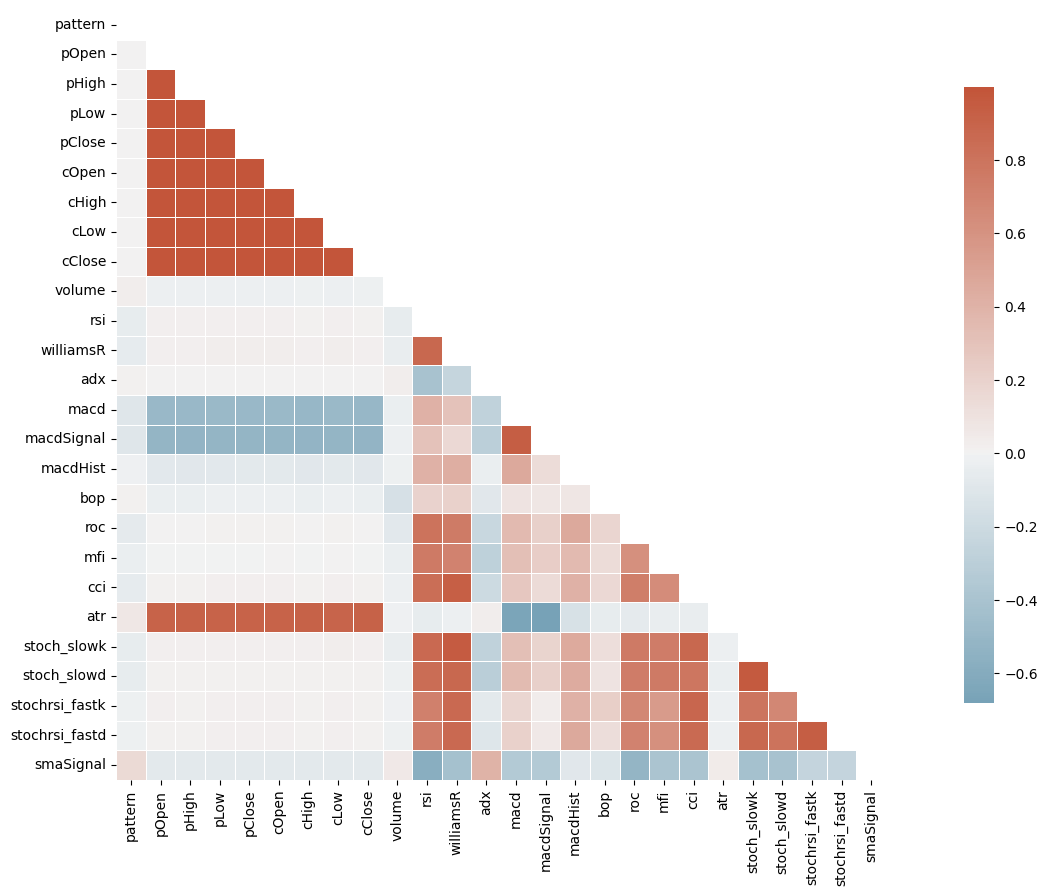

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = dfBullEngulf.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(20,10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap=cmap, 
            square=True, 
            linewidths=.5,
            center=0, 
            annot=False,
            cbar_kws={"shrink": .8})

The columns associated with the candlestick prices show a high correlation. To reduce redundancy and capture the essential variability of these variables, we apply Principal Component Analysis (PCA) techniques.


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_to_use = ['pOpen', 'pHigh', 'pClose', 'pLow', 'cOpen', 'cHigh', 'cClose', 'cLow']
X = dfBullEngulf[cols_to_use].values

# Normalize only these columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
components = pca.fit_transform(X_scaled)

# Add the PCA components to the DataFrame
dfBullEngulf['PCA1'] = components[:, 0]
dfBullEngulf['PCA2'] = components[:, 1]
dfBullEngulf['PCA3'] = components[:, 2]
dfBullEngulf['PCA4'] = components[:, 3]

#backtester
Xbt = dfBT[cols_to_use].values
Xbt_scaled = scaler.fit_transform(Xbt)
componentsBt = pca.fit_transform(Xbt_scaled)
dfBT['PCA1'] = componentsBt[:, 0]
dfBT['PCA2'] = componentsBt[:, 1]
dfBT['PCA3'] = componentsBt[:, 2]
dfBT['PCA4'] = componentsBt[:, 3]


# Save scaler and PCA
import joblib
joblib.dump(scaler, 'bullScaler.pkl')
joblib.dump(pca, 'bullPCA.pkl')


['bullPCA.pkl']

Generate distribution plots for each indicator, showing the percentage of cases that follow the pattern versus those that do not.

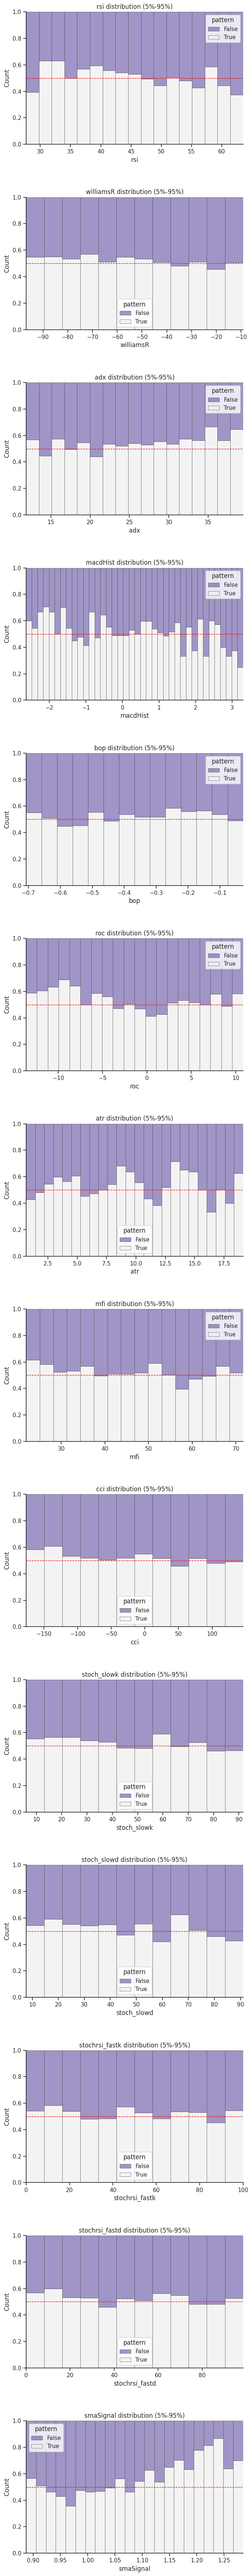

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


cols_to_graph = [
    'rsi',
    'williamsR',
    'adx',
    'macdHist',

    'bop',
    'roc',
    'atr',
    'mfi',
    'cci',

    # Stochastic Oscillator
    'stoch_slowk',
    'stoch_slowd',

    # Stochastic RSI
    'stochrsi_fastk',
    'stochrsi_fastd',
    'smaSignal',

]


def barGraphs(df, cols):
    sns.set_theme(style="ticks")
    fig, axes = plt.subplots(len(cols), 1, figsize=(7, 5*len(cols)))
    sns.despine(fig)

    for i, col in enumerate(cols):
        low, high = np.percentile(df[col], [5, 95])  
        sns.histplot(
            df[(df[col] >= low) & (df[col] <= high)],
            x=col, hue="pattern",
            multiple="fill", 
            palette="light:m_r",
            edgecolor=".3",
            linewidth=.5,
            ax=axes[i]
        )
        axes[i].set_title(f"{col} distribution (5%-95%)")
        axes[i].axhline(0.5, ls="--", c="red", lw=1)  #line in y=0.5

    fig.tight_layout()
    fig.subplots_adjust(hspace=0.4)
    return fig, axes


# call once
barGraphs(dfBullEngulf, cols_to_graph)
plt.show()





Select the columns to be used for the different models. The objective is to build a model capable of detecting the positive class with the highest possible reliability. It is not essential to detect all positive cases, but each detection made should be as trustworthy as possible.


<Axes: >

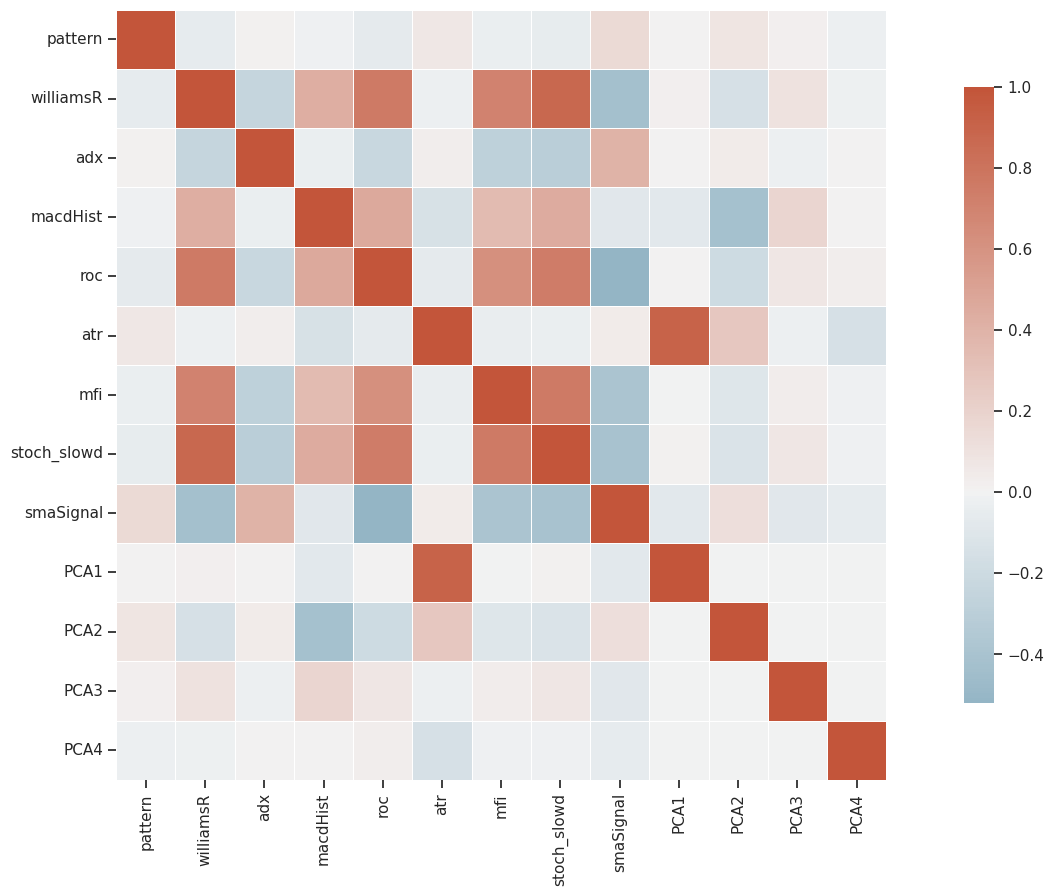

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataTraining = dfBullEngulf[[
    'pattern',

    #'rsi',
    'williamsR',
    'adx',
    #'macd',
    #'macdSignal',
    'macdHist',
    #'bop',
    'roc',
    'atr',

    'mfi',
    #'cci',
    #'stoch_slowk',
    'stoch_slowd',
    #'stochrsi_fastk',
    #'stochrsi_fastd',
    'smaSignal',
    'PCA1',
    'PCA2',
    'PCA3',
    'PCA4',
]]

corr_matrix = dataTraining.corr()

f, ax = plt.subplots(figsize=(20,10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, 
            cmap=cmap, 
            square=True, 
            linewidths=.5,
            center=0, 
            annot=False,
            cbar_kws={"shrink": .8})

Split the data into training and test sets for model training.

In [11]:
# Split data into train and test sets and balance classes with SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#Define X and y
X = dataTraining.drop(columns=['pattern'])  # all columns except the target
y = dataTraining['pattern']

#Split into train and test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training distribution: ", Counter(y_train))
print("Test distribution: ", Counter(y_test))

metricsModels = {}

Training distribution:  Counter({True: 788, False: 712})
Test distribution:  Counter({True: 198, False: 178})


The data shows a slight imbalance, with a predominance of the positive class. After testing, balancing techniques were discarded as they increased model confusion. Since the imbalance is minor and the models have internal mechanisms to handle it, the original class distribution was maintained. The related balancing code is kept commented for future updates.


In [12]:
# #SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# print(Counter(y_resampled))

# X_train = X_resampled
# y_train = y_resampled


# #UNDERSAMPLING
# from imblearn.under_sampling import RandomUnderSampler
# # Create the undersampling object
# rus = RandomUnderSampler(random_state=42)

# # Apply undersampling only on the training set
# X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# # Check the resulting distribution
# print("Original distribution:", Counter(y_train))
# print("Balanced distribution (undersampling):", Counter(y_train_res))

# X_train = X_train_res
# y_train = y_train_res


## Modeling

Using the processed dataset, we implemented three predictive models: Random Forest, XGBoost, and Neural Networks. For each of these models, we provide an analysis of feature importance as well as a comprehensive evaluation based on accuracy, precision, recall, and F1-score metrics.

### Model 1: Random Forest

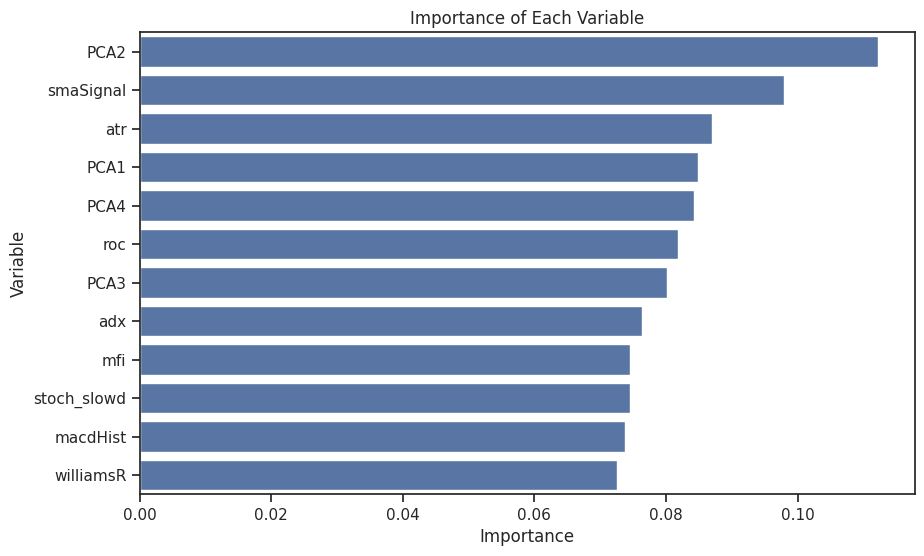

Accuracy: 0.6143617021276596
Precision: 0.6199095022624435
Recall: 0.6919191919191919
F1: 0.6539379474940334


In [13]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Create the Random Forest model
model1 = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_estimators=400,
    max_depth=None,             
    min_samples_split=5,        
    min_samples_leaf=2,         
    max_features="sqrt",        
    bootstrap=True,
    oob_score=True,             
    n_jobs=-1,
)  

# Train the model
model1.fit(X_train, y_train)

# Predictions
model1_yPred = model1.predict(X_test)
# Probabilities
model1_yProb = model1.predict_proba(X_test)[:, 1]


# Feature importance
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model1.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=importances)
plt.title("Importance of Each Variable")
plt.show()


# Metrics
metricsModels['model1'] = np.array([
    accuracy_score(y_test, model1_yPred), 
    precision_score(y_test, model1_yPred), 
    recall_score(y_test, model1_yPred), 
    f1_score(y_test, model1_yPred)
])

print("Accuracy:", metricsModels['model1'][0])
print("Precision:", metricsModels['model1'][1])
print("Recall:", metricsModels['model1'][2])
print("F1:", metricsModels['model1'][3])


### Model 2: XGBoost

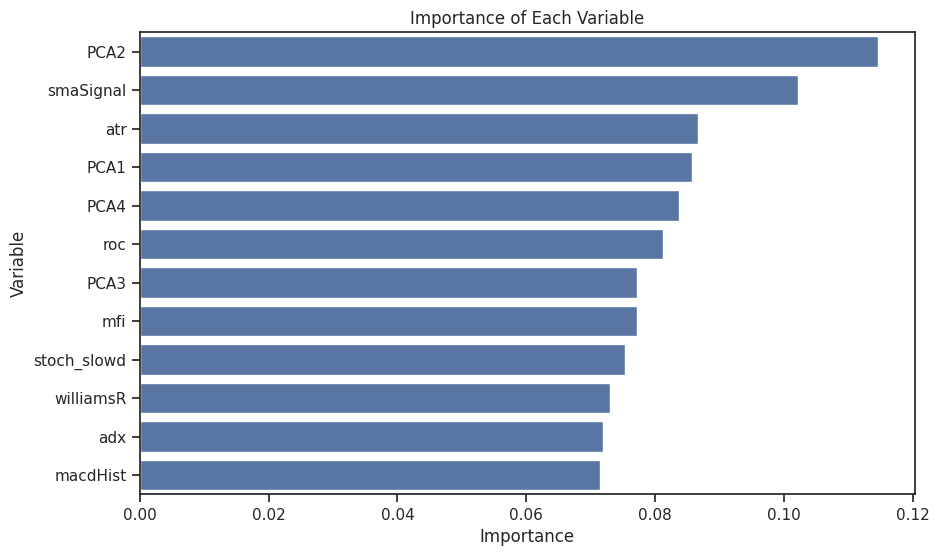

Accuracy: 0.5904255319148937
Precision: 0.6037735849056604
Recall: 0.6464646464646465
F1: 0.624390243902439


In [14]:
## XGBoost
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

# Create the XGBoost model (for binary classification)
model2 = xgb.XGBClassifier(
    random_state=42,
    n_estimators=400,
    learning_rate=0.05,       
    max_depth=3,              
    min_child_weight=3,       
    subsample=0.8,           
    colsample_bytree=0.8,     
    gamma=0.1,                
    reg_lambda=1.0,           
    reg_alpha=0.0,            
    n_jobs=-1,
    eval_metric='logloss',
    tree_method='hist'        
)

# Train
model2.fit(X_train, y_train)

# Predictions
model2_yPred = model2.predict(X_test)
# Probabilities
model2_yProb = model2.predict_proba(X_test)[:, 1]


# Feature importance
importances = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model2.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=importances)
plt.title("Importance of Each Variable")
plt.show()

# Metrics
metricsModels['model2'] = np.array([
    accuracy_score(y_test, model2_yPred), 
    precision_score(y_test, model2_yPred), 
    recall_score(y_test, model2_yPred), 
    f1_score(y_test, model2_yPred)
])

print("Accuracy:", metricsModels['model2'][0])
print("Precision:", metricsModels['model2'][1])
print("Recall:", metricsModels['model2'][2])
print("F1:", metricsModels['model2'][3])


### Model 3: Neural Networks

In [15]:
# Neural Network 

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")  #ignore warnings
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model
model3 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)


#training
history = model3.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    class_weight={0:1.2, 1:1.0},  # Ajuste ligero por desbalance
    verbose=1
)

I0000 00:00:1756920157.788423   43408 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3459 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/200
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.5584 - accuracy: 0.5353 - loss: 0.8060

I0000 00:00:1756920161.245360   43594 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - AUC: 0.5560 - accuracy: 0.5283 - loss: 0.7981 - val_AUC: 0.5572 - val_accuracy: 0.5167 - val_loss: 0.6912
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5663 - accuracy: 0.5217 - loss: 0.7680 - val_AUC: 0.5661 - val_accuracy: 0.5200 - val_loss: 0.6902
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6038 - accuracy: 0.5675 - loss: 0.7450 - val_AUC: 0.5865 - val_accuracy: 0.5500 - val_loss: 0.6876
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5924 - accuracy: 0.5658 - loss: 0.7479 - val_AUC: 0.5745 - val_accuracy: 0.5533 - val_loss: 0.6905
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5959 - accuracy: 0.5725 - loss: 0.7443 - val_AUC: 0.5870 - val_accuracy: 0.5633 - val_loss: 0.6883
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6025 - accuracy: 0.5608 - loss: 0.7393 - val_AUC: 0.5981 - val_accuracy: 0.5900 - val_loss: 0.6862
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC:

In [16]:
#Predicciones
model3_yPredProba = model3.predict(X_test_scaled)

model3_yPred = (model3_yPredProba > 0.5).astype(bool)

# Metrics
metricsModels['model3'] = np.array([
    accuracy_score(y_test, model3_yPred),
    precision_score(y_test, model3_yPred),
    recall_score(y_test, model3_yPred),
    f1_score(y_test, model3_yPred)
])

print("Accuracy:", metricsModels['model3'][0])
print("Precision:", metricsModels['model3'][1])
print("Recall:", metricsModels['model3'][2])
print("F1 Score:", metricsModels['model3'][3])

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Accuracy: 0.598404255319149
Precision: 0.6180904522613065
Recall: 0.6212121212121212
F1 Score: 0.6196473551637279


## Evaluation

We begin the evaluation of the models by displaying the confusion matrix and ROC curves for each of them.


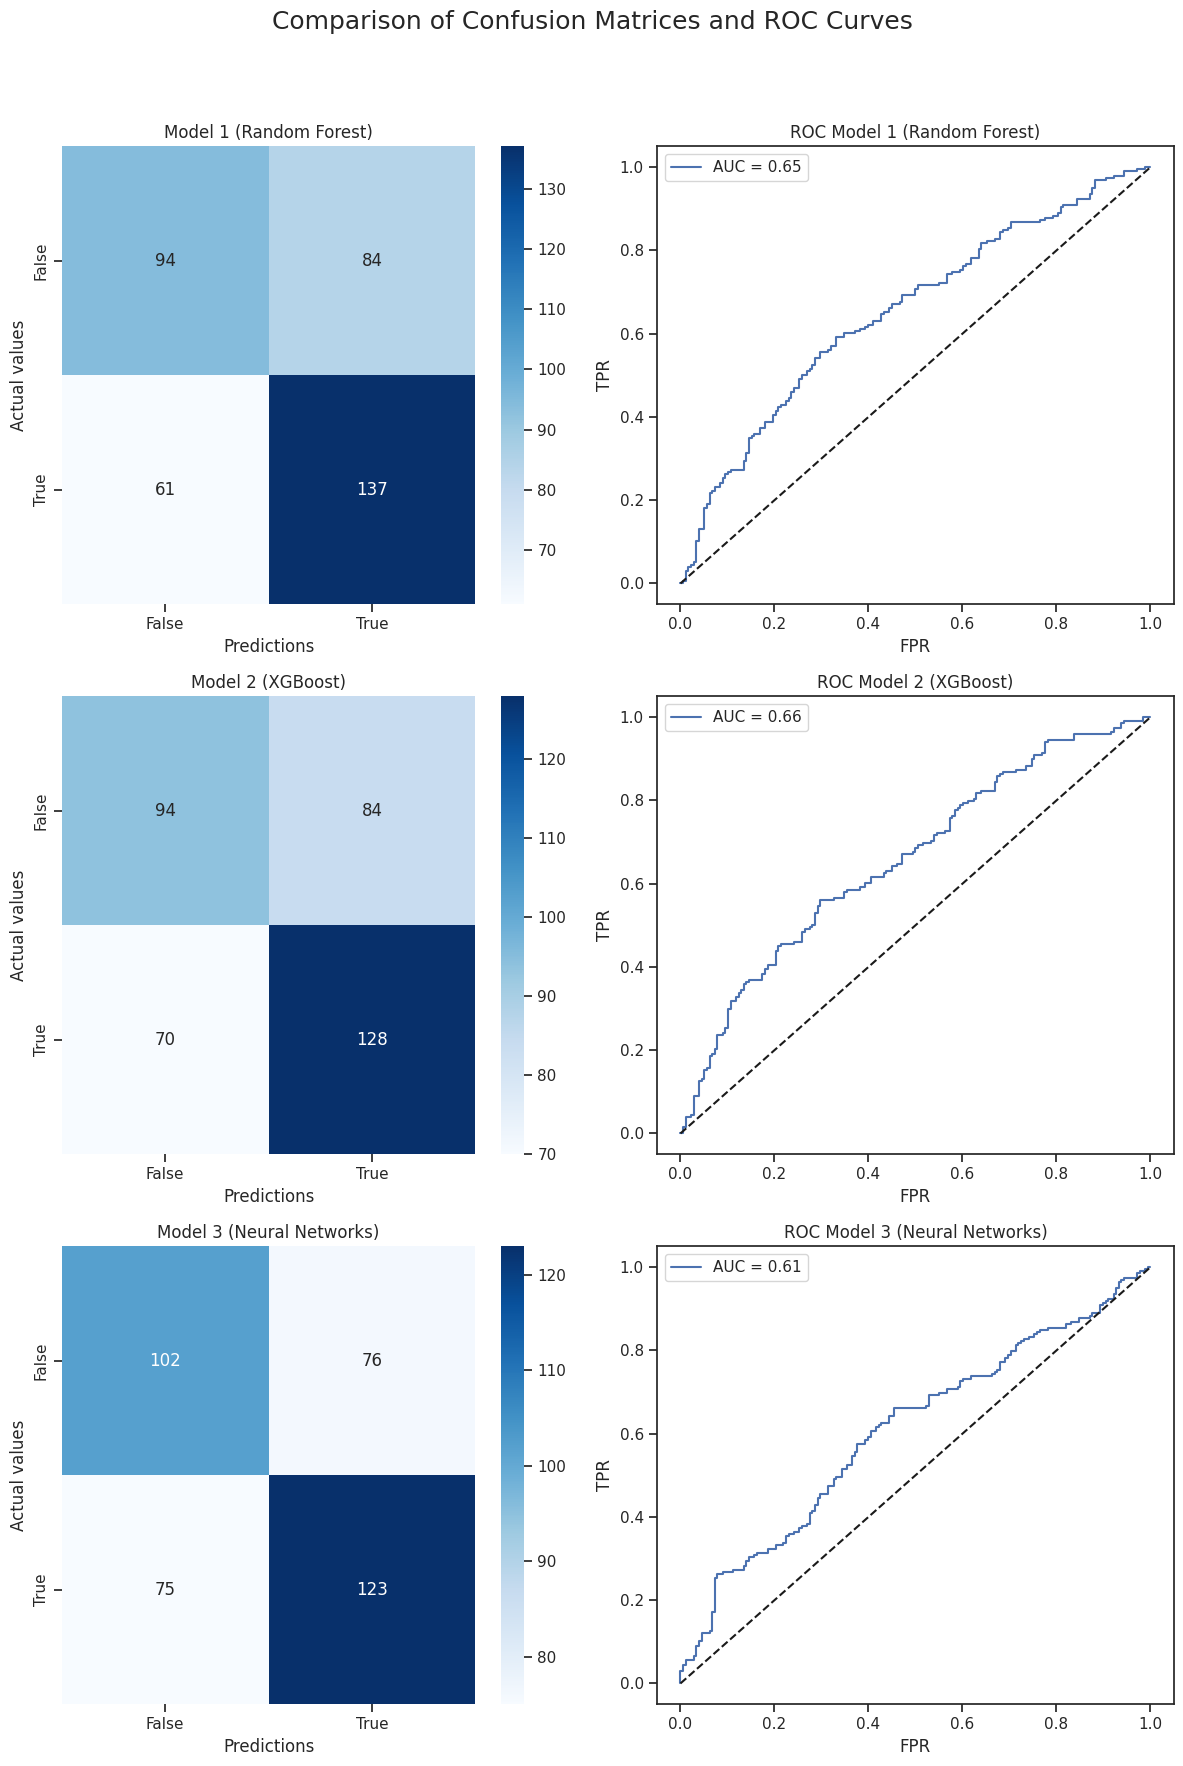

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

classes = [False, True]

model1_CM = confusion_matrix(y_test, model1_yPred, labels=classes)
model2_CM = confusion_matrix(y_test, model2_yPred, labels=classes)
model3_CM = confusion_matrix(y_test, model3_yPred, labels=classes)

cm_df1 = pd.DataFrame(model1_CM, index=classes, columns=classes)
cm_df2 = pd.DataFrame(model2_CM, index=classes, columns=classes)
cm_df3 = pd.DataFrame(model3_CM, index=classes, columns=classes)

# Create figure with 2 columns: left for heatmaps, right for ROC curves
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

#Heatmaps
sns.heatmap(cm_df1, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Model 1 (Random Forest)')
axes[0,0].set_ylabel('Actual values')
axes[0,0].set_xlabel('Predictions')

sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Model 2 (XGBoost)')
axes[1,0].set_ylabel('Actual values')
axes[1,0].set_xlabel('Predictions')

sns.heatmap(cm_df3, annot=True, fmt='d', cmap='Blues', ax=axes[2,0])
axes[2,0].set_title('Model 3 (Neural Networks)')
axes[2,0].set_ylabel('Actual values')
axes[2,0].set_xlabel('Predictions')

# ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, model1_yProb)
fpr2, tpr2, _ = roc_curve(y_test, model2_yProb)
fpr3, tpr3, _ = roc_curve(y_test, model3_yPredProba)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

axes[0,1].plot(fpr1, tpr1, label=f'AUC = {auc1:.2f}')
axes[0,1].plot([0,1], [0,1], 'k--')
axes[0,1].set_title('ROC Model 1 (Random Forest)')
axes[0,1].set_xlabel('FPR')
axes[0,1].set_ylabel('TPR')
axes[0,1].legend()

axes[1,1].plot(fpr2, tpr2, label=f'AUC = {auc2:.2f}')
axes[1,1].plot([0,1], [0,1], 'k--')
axes[1,1].set_title('ROC Model 2 (XGBoost)')
axes[1,1].set_xlabel('FPR')
axes[1,1].set_ylabel('TPR')
axes[1,1].legend()

axes[2,1].plot(fpr3, tpr3, label=f'AUC = {auc3:.2f}')
axes[2,1].plot([0,1], [0,1], 'k--')
axes[2,1].set_title('ROC Model 3 (Neural Networks)')
axes[2,1].set_xlabel('FPR')
axes[2,1].set_ylabel('TPR')
axes[2,1].legend()

# Overall title
fig.suptitle('Comparison of Confusion Matrices and ROC Curves', fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [18]:
import pandas as pd
from IPython.display import display, HTML

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Model 1 (Random Forest)': [
        metricsModels['model1'][0],
        metricsModels['model1'][1],
        metricsModels['model1'][2],
        metricsModels['model1'][3]
    ],
    'Model 2 (XGBoost)': [
        metricsModels['model2'][0],
        metricsModels['model2'][1],
        metricsModels['model2'][2],
        metricsModels['model2'][3]
    ],
    'Model 3 (Neural Networks)': [
        metricsModels['model3'][0],
        metricsModels['model3'][1],
        metricsModels['model3'][2],
        metricsModels['model3'][3]
    ]
}

# Convert to DataFrame
df_metrics = round(pd.DataFrame(metrics), 4)

html = df_metrics.to_html(index=False)
display(HTML(f"<div style='display:flex; justify-content:center'>{html}</div>"))


Metric,Model 1 (Random Forest),Model 2 (XGBoost),Model 3 (Neural Networks)
Accuracy,0.6144,0.5904,0.5984
Precision,0.6199,0.6038,0.6181
Recall,0.6919,0.6465,0.6212
F1 Score,0.6539,0.6244,0.6196


In general, all models show similar performance, although Model 1 (Random Forest) stands out as the most promising, displaying a better balance among the evaluated metrics. To analyze its performance in more detail, we generate a comparative plot showing the evolution of four key metrics (precision, recall, F1-score, and accuracy) under different decision threshold values for the Random Forest model.


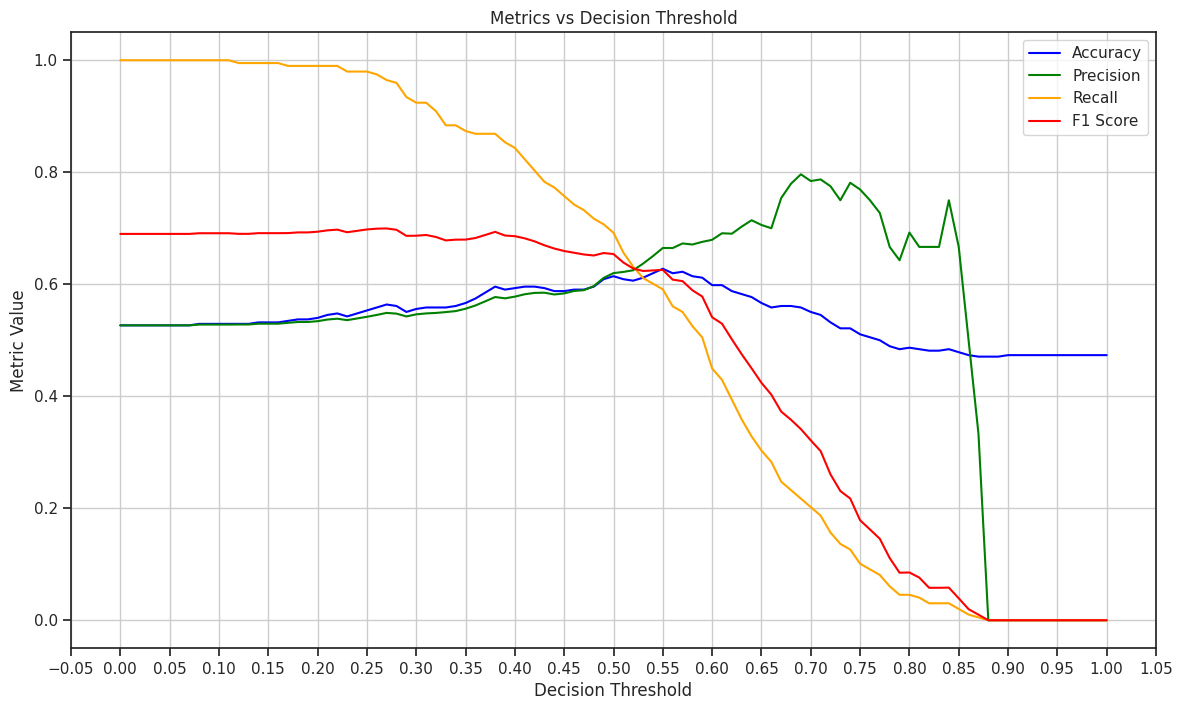

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.ticker as ticker


# Define the thresholds to evaluate
thresholds = np.linspace(0, 1, 101)  # from 0 to 1 in steps of 0.01

# Lists to store metrics
accuracies = []
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred_thresh = (model1_yProb >= t).astype(bool)
    accuracies.append(accuracy_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# Plot
plt.figure(figsize=(14, 8))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='green')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, f1s, label='F1 Score', color='red')
plt.xlabel('Decision Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs Decision Threshold')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.05))

plt.show()


The plot shows that the highest accuracy for the positive class (without dropping below 50% for the other metrics) is achieved with a threshold of 0.64. However, the best balance among the different metrics is obtained with a threshold of 0.45, making it a more suitable cutoff point for achieving balanced model performance.


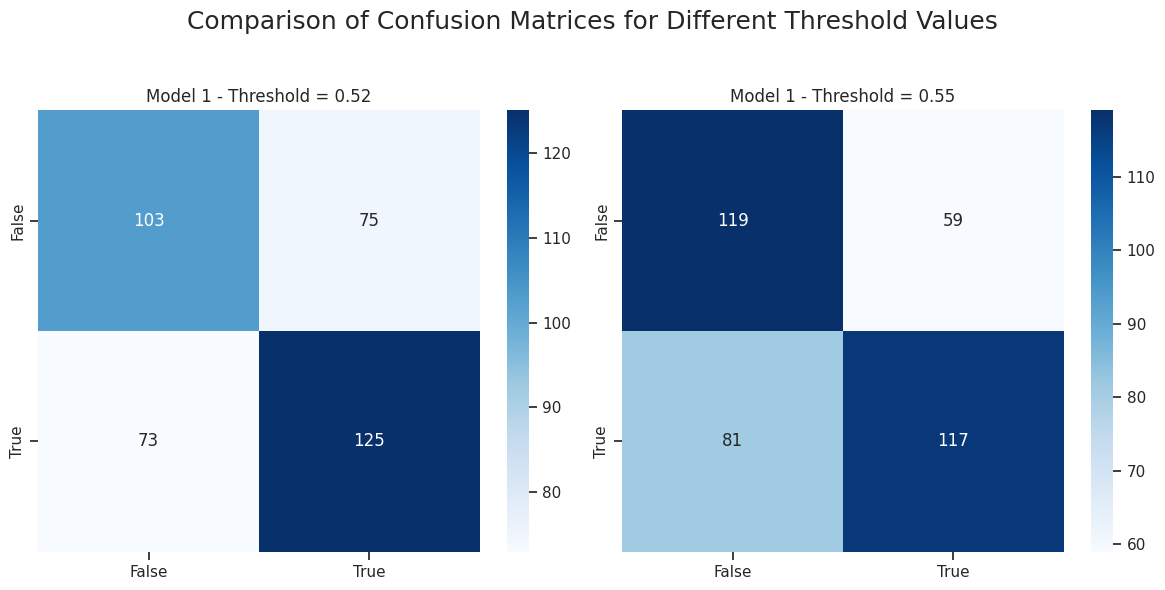

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

thresholds = [0.52, 0.55]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, th in enumerate(thresholds):
    # Convert probabilities to predictions using the threshold
    y_pred_threshold = (model1_yProb >= th).astype(bool)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_threshold)

    # Plot the matrix on the corresponding axis
    cm_df = pd.DataFrame(cm, index=['False', 'True'], columns=['False', 'True'])
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[i])

    axes[i].set_title(f'Model 1 - Threshold = {th}')

    # --- Metrics ---
    metricsModels[f'model1_th_{th}'] = [
        accuracy_score(y_test, y_pred_threshold), 
        precision_score(y_test, y_pred_threshold), 
        recall_score(y_test, y_pred_threshold), 
        f1_score(y_test, y_pred_threshold)
    ]

plt.tight_layout()
# Overall title
fig.suptitle('Comparison of Confusion Matrices for Different Threshold Values', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [21]:
from IPython.display import display, HTML
import pandas as pd

# Metric names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Dictionary with thresholds and the original model
versions = {
    'Model 1 (original)': 'model1',
    f'Model 1 (Threshold {thresholds[0]})': f'model1_th_{thresholds[0]}',
    f'Model 1 (Threshold {thresholds[1]})': f'model1_th_{thresholds[1]}'
}

# Create dictionary for the DataFrame
table_dict = {'Metric': metrics_names}
for name, key in versions.items():
    table_dict[name] = [round(m, 4) for m in metricsModels[key]]

# Convert to DataFrame
table_df = pd.DataFrame(table_dict)

html = table_df.to_html(index=False)
display(HTML(f"<div style='display:flex; justify-content:center'>{html}</div>"))


Metric,Model 1 (original),Model 1 (Threshold 0.52),Model 1 (Threshold 0.55)
Accuracy,0.6144,0.6064,0.6277
Precision,0.6199,0.6250,0.6648
Recall,0.6919,0.6313,0.5909
F1 Score,0.6539,0.6281,0.6257


Adjusting the threshold to higher values can increase precision at the expense of reducing recall. Conversely, lowering the threshold increases recall but decreases precision. In any case, modifying the threshold does not significantly improve model performance compared to the standard value of 0.5, but it results in a more balanced behavior when the threshold is set to 0.52. Finally, we export the Random Forest model.

## Backtest

We perform a backtest using data from a different index. In this case, we use 20 NYSE stocks collected along with the training data, already prepared for use.

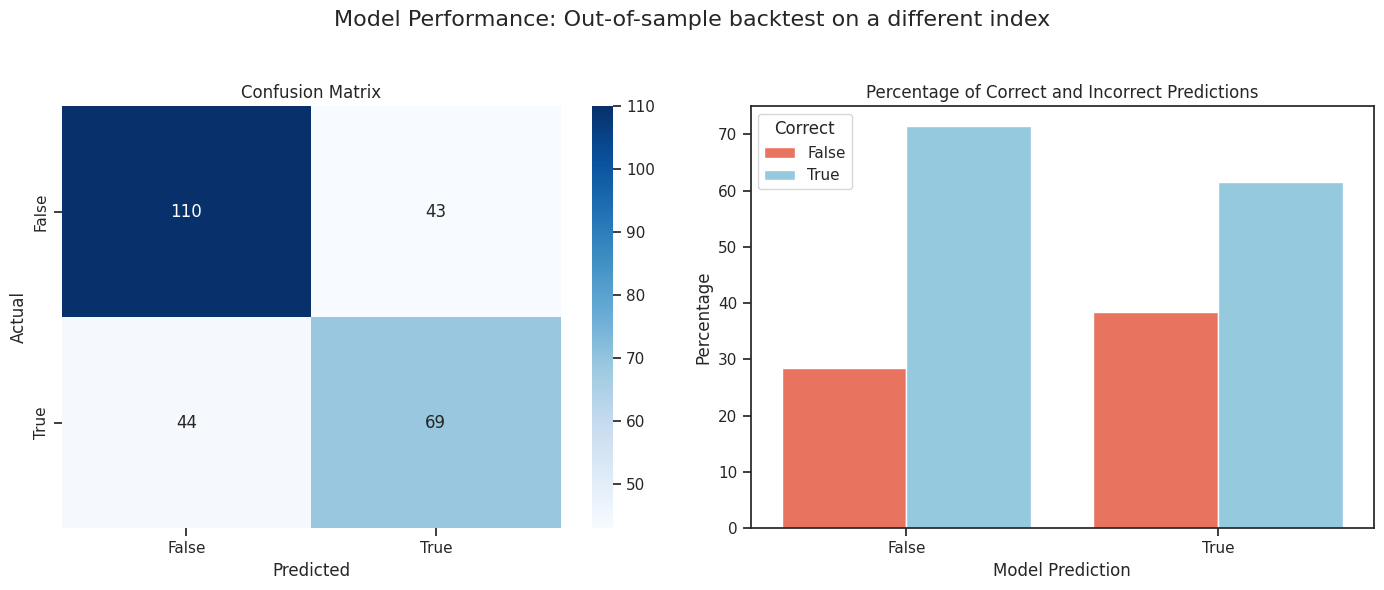

Accuracy: 0.6729
Precision: 0.6161
Recall: 0.6106
F1 Score: 0.6133


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataBackTest = dfBT[[
    'pattern',  #if bull engulfing is true or false
    'williamsR',
    'adx',
    'macdHist',
    'roc',
    'atr',
    'mfi',
    'stoch_slowd',
    'smaSignal',
    'PCA1',
    'PCA2',
    'PCA3',
    'PCA4',
]]

threshold = 0.55

y_true = dataBackTest['pattern']

y_prob = model1.predict_proba(dataBackTest.iloc[:, 1:])[:, 1]

y_pred = (y_prob >= threshold).astype(bool)

results = pd.DataFrame({
    "y_true": dataBackTest['pattern'],
    "y_pred": y_pred
})



## Confusion matrix
cm = confusion_matrix(results['y_true'], results['y_pred'])
# Convert to a DataFrame with readable row and column labels
cm_df = pd.DataFrame(cm, index=['False', 'True'], columns=['False', 'True'])

# Create a column indicating correct predictions
results['correct'] = results['y_true'] == results['y_pred']

# Group by predicted value and correctness, then count occurrences
summary = results.groupby(['y_pred', 'correct']).size().reset_index(name='count')

# Calculate percentage within each predicted class
summary['percent'] = summary.groupby('y_pred')['count'].transform(lambda x: 100 * x / x.sum())



fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')
axes[0].set_title('Confusion Matrix')

# bar graph
sns.barplot(
    data=summary,
    x='y_pred',
    y='percent',
    hue='correct',
    palette={True: 'skyblue', False: 'tomato'},
    ax=axes[1]
)
axes[1].set_xlabel('Model Prediction')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Percentage of Correct and Incorrect Predictions')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['False', 'True'])
axes[1].legend(title='Correct')

fig.suptitle('Model Performance: Out-of-sample backtest on a different index', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In the out-of-sample backtest on NYSE stocks, the model demonstrates a stronger ability to correctly identify negative cases than positive ones, as reflected by the confusion matrix. Specifically, there are 110 true negatives compared to 69 true positives. Misclassifications are relatively balanced, with 44 false negatives and 43 false positives, indicating that the model does not disproportionately favor one class over the other. The prediction distribution further supports this behavior, showing that while the model is not perfectly accurate, it maintains a fairly even distribution of errors across both classes.

Overall, the results suggest that the model possesses moderate predictive power with a slight inclination toward higher precision. This characteristic makes it particularly suitable for scenarios where false positives are more costly than false negatives, as it tends to minimize incorrect positive predictions. Despite its limitations, the balanced error distribution and emphasis on precision indicate that the model can provide valuable insights for decision-making in the NYSE stock context.

In [23]:
import joblib
from datetime import datetime

# Get current date
current_date = datetime.now().strftime("%d.%m.%Y")

# File name with date included
filename = f"modelBullEngulf_{current_date}.joblib"

# Save the model
joblib.dump(model1, filename)


['modelBullEngulf_03.09.2025.joblib']

# Conclusions

This project demonstrated the feasibility of applying technical analysis techniques and predictive modeling to assess the validity of the Bullish Engulfing pattern in financial markets. Using historical price and volume data, enriched with technical indicators such as RSI, MACD, ADX, and Bollinger Bands, a methodological framework was developed that not only detects the emergence of the pattern but also evaluates its confirmation in the days that follow. This approach allowed us to overcome the classical limitation of technical analysis, in which the mere observation of a pattern does not ensure a robust prediction.

The results suggest that the Bullish Engulfing pattern, while a relevant signal of a potential trend reversal, cannot be regarded in isolation as a reliable buy indicator. The integration of techniques such as Principal Component Analysis (PCA) and the use of probabilistic predictive models enhanced the ability to discriminate between valid and false signals, thereby reducing the risk of misinterpretation. Nonetheless, the market’s inherent volatility and the influence of exogenous factors, such as news or macroeconomic events, remain unavoidable limitations.

In conclusion, the use of predictive models applied to Japanese candlestick patterns represents an important step forward in developing quantitative tools to support financial decision-making. This project should not be interpreted as an investment recommendation but rather as a methodological contribution that combines statistics, machine learning, and technical analysis to provide a more robust framework for evaluating market signals.